In [7]:
import scipy as sp

import matplotlib.pyplot as plt

from ipywidgets import interact, interactive, fixed
from IPython.display import display
from IPython.html import widgets

%matplotlib inline

In chapter 2, we demonstrate the convex nature of mixing by playing a game. You are given three beakers by your boss and you are required to achieve seven distinct concentrations from these three concentrations.

We first define the three concentrations supplied by your boss by symbols b1 - b3. The desired mixture concentrations are also specified by variables x1 to x7

In [2]:
#beaker concentrations
b1 = sp.array([9.0, 1.0])
b2 = sp.array([1.0, 9.0])
b3 = sp.array([2.0, 3.0])

#desired concentrations
c1 = sp.array([3.0, 5.0])
c2 = sp.array([4.0, 2.0])
c3 = sp.array([1.0, 6.0])
c4 = sp.array([9.0, 9.0])
c5 = sp.array([5.0, 5.0])
c6 = sp.array([2.0, 7.7])
c7 = sp.array([2.2, 8.0])

We desire to plot the concentrations in cX-cY space and display the possible mixtures obtained by mixtures of b1, b2 and b3. 

For performance reasons when plotting, we combine the concentrations into a matrices Xs and Bs representing the desired concentrations and beaker concentrations, respectively.

In [3]:
#combine concentrations for performance when plotting
Xs = sp.vstack([c1,c2,c3,c4,c5,c6,c7])
Bs = sp.vstack([b1,b2,b3])

Next, a plotting function is created that will display all concentrations in cX-cY space. The final mixture concentration is calculated by specifying volumes for b1, b2 and b3 with their respective concentrations in a simple component molar balance. Since density is assumed constant, the total volume is given by the sum of the individual beaker volumes.

In [4]:
def plot_fn(V1=50, V2=50, V3=50,
           use_x4 = False, V4=50.,
           use_x2 = False, V5=50.):
    
    Vtot = V1 + V2 + V3 + use_x4*V4 + use_x2*V5   #total volume of mixture in L
    
    cX_mix = (V1*b1[0] + V2*b2[0] + V3*b3[0] + use_x4*V4*c4[0] + use_x2*V5*c2[0])/Vtot
    cY_mix = (V1*b1[1] + V2*b2[1] + V3*b3[1] + use_x4*V4*c4[1] + use_x2*V5*c2[1])/Vtot
    
    fig = plt.figure()
    ax = fig.gca()
    plt.hold(True)
    
    #plot beaker concentrations
    '''plt.plot(b1[0],b1[1], 'b^')
    plt.plot(b2[0],b2[1], 'b^')
    plt.plot(b3[0],b3[1], 'b^')'''
    plt.plot(Bs[:,0],Bs[:,1], 'b^')
    ax.text(b1[0]*1.03,b1[1],'$\mathbf{b_1}$', fontsize=13)
    ax.text(b2[0],b2[1]*1.05,'$\mathbf{b_2}$', fontsize=13)
    ax.text(b3[0],b3[1]*0.75,'$\mathbf{b_3}$', fontsize=13)
    
    #plot desired concentrations
    '''plt.plot(c1[0],c1[1], 'rx')
    plt.plot(c2[0],c2[1], 'rx')
    plt.plot(c3[0],c3[1], 'rx')
    plt.plot(c4[0],c4[1], 'rx')
    plt.plot(c5[0],c5[1], 'rx')
    plt.plot(c6[0],c6[1], 'rx')
    plt.plot(c7[0],c7[1], 'rx')'''
    plt.plot(Xs[:,0],Xs[:,1], 'rx')
    
    '''ax.text(c1[0],c1[1]*0.85, '$\mathbf{x_1}$', fontsize=13)
    ax.text(c2[0],c2[1]*0.70, '$\mathbf{x_2}$', fontsize=13)
    ax.text(c3[0]*0.75,c3[1]*1.05, '$\mathbf{x_3}$', fontsize=13)
    ax.text(c4[0],c4[1]*1.05, '$\mathbf{x_4}$', fontsize=13)
    ax.text(c5[0],c5[1]*1.05, '$\mathbf{x_5}$', fontsize=13)
    ax.text(c6[0]*0.85,c6[1]*0.90, '$\mathbf{x_6}$', fontsize=13)
    ax.text(c7[0],c7[1]*1.05, '$\mathbf{x_7}$', fontsize=13)'''
    
    #plot mixture concentration
    plt.plot(cX_mix, cY_mix, 'gv')
    
    plt.title('Total mixture volume = %.0f L'%Vtot)
    plt.xlabel('Component X (mol/L)')
    plt.ylabel('Component Y (mol/L)')
    plt.axis([0,10, 0,10])
    plt.show()

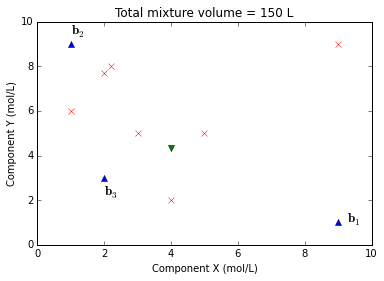

In [5]:
interactive(plot_fn, V1=(0.,100.,1), V2=(0.,100.,1), V3=(0.,100.,1),
           use_x4 = widgets.Checkbox(description='Use X4'), V4=(0.,100.,1.),
           use_x2 = widgets.Checkbox(description='Use x2'), V5=(0.,100.,1.))